In [1]:
import chess

## ***HEURISTICS***

In [3]:
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]
bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]
rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]
queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]
kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [4]:
def material_heuristic(board):
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))

    material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq) 
    return material

In [5]:
def attack_heuristic(board):
        attack_advantage = 0
      
        for piece_type in chess.PIECE_TYPES:
            for piece in board.pieces(piece_type, chess.WHITE):
                attack_advantage += len(chess.SquareSet(board.attacks_mask(piece)))

        for piece_type in chess.PIECE_TYPES:
            for piece in board.pieces(piece_type, chess.BLACK):
                attack_advantage -= len(chess.SquareSet(board.attacks_mask(piece)))

        return attack_advantage

In [6]:
def positional_heuristic(board):
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])
    
    value = pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    return value

In [7]:
def evaluate_board(board):
    
    eval = positional_heuristic(board) + material_heuristic(board) + attack_heuristic(board)
    return eval
  

# **AGENTS**

In [36]:
def whitePlayer(board):
  turn = 'white'
  ismaximizing = True
  move = minimaxRoot(2,board,ismaximizing,False,dataSet,turn)
  return move

In [37]:
def blackPlayer(board):
  turn = 'black'
  ismaximizing = False
  move = minimaxRoot(2,board,ismaximizing,False,dataSet,turn)
  return move

# **MIN MAX WITHOUT PREDICTION**

In [10]:
def minimaxRoot(depth, board,isMaximizing, predictor,dataSet,turn):
    possibleMoves = board.legal_moves
    bestMove = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board,-10000,10000, not isMaximizing,turn))
        board.pop()
        if( value > bestMove):
            bestMove = value
            bestMoveFinal = move
    if not predictor:
      save_heuristics_into_dataset(board, value, isMaximizing,dataSet)
    return bestMoveFinal

def minimax(depth, board, alpha, beta, is_maximizing,turn):
    if(depth == 0):
      if turn == 'white':
        return evaluate_board(board)
      else:
        return -evaluate_board(board)
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimax(depth - 1, board,alpha,beta, not is_maximizing,turn))
            board.pop()
            alpha = max(alpha,bestMove)
            if beta <= alpha:
              return bestMove
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board,alpha,beta, not is_maximizing,turn))
            board.pop()
            beta = min(beta,bestMove)
            if(beta <= alpha):
                return bestMove
        return bestMove

def save_heuristics_into_dataset(board, bestMove, is_maximizing, dataSet):
        h1 = material_heuristic(board)
        h2 = positional_heuristic(board)
        h3 = attack_heuristic(board) 
        
        instance = [
            h1,
            h2 * 0.5,
            h3 * 0.3,
            bestMove
        ]
        dataSet.append(instance)

In [11]:
dataSet = []

In [14]:
import random

def main():
    board = chess.Board()
    i = 0
    while i <= 5:
      lista = list(board.legal_moves)
      board.push(lista[random.randint(i,len(lista)-1)])
      i = i+1
    movecounter = 1 
    n = 0
    while True:
      if n%2 == 0:
        move = whitePlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1
      else:
        move = blackPlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1
      
  
      if board.is_checkmate():
        print("CheckMate!")
        if movecounter%2 == 0:
          print("Black Player Win in "+ str(movecounter) + " moves!")
        else:
          print("White Player Win in " + str(movecounter) + " moves!")
        break
  
      if board.is_stalemate():
        print("stalemate")
        break
    
      if board.is_seventyfive_moves():
        print("seventyFiveMoves")
        break

      if board.is_insufficient_material():
        print("insufficientMaterial")
        break

    return board


CheckMate!
White Player Win in 21 moves!


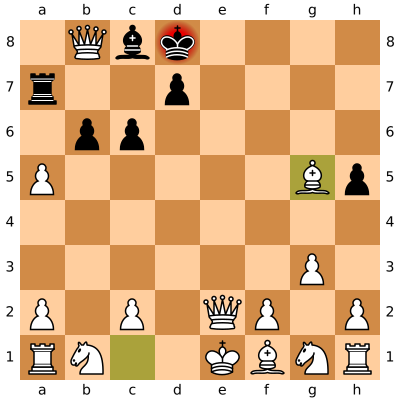

In [19]:
main()

# ***CREATION OF DATASET***

In [26]:
import random

def createDataset():
 x = 0
 while x < 100:
    board = chess.Board()
    i = 0
    while i <= 5:
      lista = list(board.legal_moves)
      board.push(lista[random.randint(i,len(lista)-1)])
      i = i+1
    movecounter = 1 
    n= 0
    while True:
      if n%2 == 0:
        move = whitePlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1
        n +=1
      else:
        move = blackPlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1
        n+=1
      
  
      if board.is_checkmate():
        print("CheckMate!")
        if movecounter%2 == 0:
          print("Black Player Win in "+ str(movecounter) + " moves!")
        else:
          print("White Player Win in " + str(movecounter) + " moves!")
          board.reset()
        break
  
      if board.is_stalemate():
        print("stalemate")
        board.reset()
        break
    
      if board.is_seventyfive_moves():
        print("seventyFiveMoves")
        board.reset()
        break

      if board.is_insufficient_material():
        print("insufficientMaterial")
        board.reset()
        break
    
    board.reset()
    x +=1
    print("PARTITA NUMERO" + str(x))
    #return board


In [25]:
dataSet = []

In [27]:
createDataset()

CheckMate!
Black Player Win in 46 moves!
PARTITA NUMERO1
CheckMate!
Black Player Win in 46 moves!
PARTITA NUMERO2
CheckMate!
Black Player Win in 32 moves!
PARTITA NUMERO3
CheckMate!
Black Player Win in 40 moves!
PARTITA NUMERO4
stalemate
PARTITA NUMERO5
stalemate
PARTITA NUMERO6
CheckMate!
Black Player Win in 28 moves!
PARTITA NUMERO7
CheckMate!
Black Player Win in 2 moves!
PARTITA NUMERO8
CheckMate!
Black Player Win in 50 moves!
PARTITA NUMERO9
CheckMate!
Black Player Win in 34 moves!
PARTITA NUMERO10
CheckMate!
Black Player Win in 50 moves!
PARTITA NUMERO11
CheckMate!
Black Player Win in 30 moves!
PARTITA NUMERO12
CheckMate!
Black Player Win in 28 moves!
PARTITA NUMERO13
CheckMate!
Black Player Win in 20 moves!
PARTITA NUMERO14
CheckMate!
Black Player Win in 42 moves!
PARTITA NUMERO15
CheckMate!
Black Player Win in 44 moves!
PARTITA NUMERO16
CheckMate!
Black Player Win in 52 moves!
PARTITA NUMERO17
seventyFiveMoves
PARTITA NUMERO18
CheckMate!
Black Player Win in 52 moves!
PARTITA NUM

# **PREDICTION**

In [28]:
import pandas as pd

pd1 = pd.DataFrame(dataSet,columns=["h1","h2","h3","Hl"])
pd1

,h1,h2,h3,Hl
0,0,10.0,0.3,5
1,100,15.0,0.9,18
2,0,5.0,-1.5,-40
3,0,30.0,0.3,51
4,0,5.0,-1.5,-41
...,...,...,...,...
2471,1770,7.5,10.5,1807
2472,1870,10.0,11.4,-1752
2473,1770,2.5,9.6,2311
2474,2270,7.5,13.5,-2266


In [29]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

dataSetCopy = pd1.copy()
X = dataSetCopy.drop('Hl', axis=1)
labelEnc = preprocessing.LabelEncoder() 
y = dataSetCopy['Hl']
y_encoded = labelEnc.fit_transform(y) 


X_train, X_test, y_train, y_test = train_test_split(X.values, y_encoded, test_size=0.2)


mlp = MLPClassifier()
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [30]:
from sklearn.metrics import accuracy_score
predTest = mlp.predict(X_test)
testAccuracy = accuracy_score(y_test,predTest)*100
testAccuracy

12.5

# **MINMAX WITH PREDICTION**

In [40]:
def minimaxRootPredicted(depth, board,isMaximizing,turn):
    possibleMoves = board.legal_moves
    bestMove = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimaxPredicted(depth - 1, board,-10000,10000, not isMaximizing,turn))
        board.pop()
        if( value > bestMove):
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimaxPredicted(depth, board, alpha, beta, is_maximizing,turn):
    if(depth == 0):

        h1 = material_heuristic(board) 
        h2 = positional_heuristic(board) 
        h3 = attack_heuristic(board)
        value = mlp.predict([[h1,h2,h3]])
        return value
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimaxPredicted(depth - 1, board,alpha,beta, not is_maximizing,turn))
            board.pop()
            alpha = max(alpha,bestMove)
            if beta <= alpha:
              return bestMove
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board,alpha,beta, not is_maximizing,turn))
            board.pop()
            beta = min(beta,bestMove)
            if(beta <= alpha):
                return bestMove
        return bestMove

In [41]:
import random

def mainPrediction():
    board = chess.Board()
    i = 0
    while i < 6:
      lista = list(board.legal_moves)
      board.push(lista[random.randint(i,len(lista)-1)])
      i = i+1
    movecounter = 1 
    n = 0
    while True:
      if n%2 ==0:
        move = whitePlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1
      else:
        move = blackPlayer(board)
        move = chess.Move.from_uci(str(move))
        board.push(move)
        movecounter += 1

  
      if board.is_checkmate():
        print("CheckMate!")
        if movecounter%2 == 0:
          print("Black Player Win in "+ str(movecounter) + " moves!")
        else:
          print("White Player Win in " + str(movecounter) + " moves!")
        break
  
      if board.is_stalemate():
        print("stalemate")
        break
    
      if board.is_seventyfive_moves():
        print("seventyFiveMoves")
        break

      if board.is_insufficient_material():
        print("insufficientMaterial")
        break

    return board


CheckMate!
Black Player Win in 40 moves!


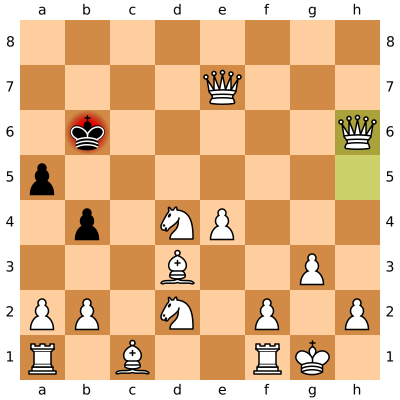

In [42]:
mainPrediction()